In [1]:
using ResourceManagement
using DataFrames
using CSV
using Plots
using StatsPlots

## Read info from SAP

In [2]:
dfLabor =  ReadLaborTracker("actual_planByDeptByProject06172022.csv");

In [3]:
dfcost =  ReadCostTracker("costTracker_06162022.csv");

## Create Project Objects

In [4]:
p154662 = Project("154662" , "Burlington");

In [5]:
p158070 = Project("158070" , "Walmart");

In [6]:
p152242 = Project("152242" , "Amazon SMF3");

In [7]:
p150547 = Project("150547" , "Richemont");

## Write Cost information from SAP

In [8]:
fetchAndWriteProjectFinances!(dfcost, "154662", "430300", p154662);

In [9]:
fetchAndWriteProjectFinances!(dfcost, "158070", "430300", p158070);

In [10]:
fetchAndWriteProjectFinances!(dfcost, "152242", "430300", p152242);

In [11]:
fetchAndWriteProjectFinances!(dfcost, "150547", "430300", p150547);

In [12]:
p154662.Number

"154662"

In [13]:
dfLabor.Project

27-element Vector{Int64}:
 150547
 152242
 152242
 152242
 154662
 154662
 154662
 154662
 154662
 154662
      ⋮
 154662
 154662
 154662
 154662
 154662
 154662
 158070
 158070
 158070

In [15]:
df1 = filter(:Project => p -> p .== parse(Int64, p154662.Number), dfLabor);

In [16]:
dfp = df1[:, 7:end]; #select columns

In [17]:
s =map(s -> occursin("Forecast", s), names(dfp)); #select columns containing "forecast" to be eliminated

In [18]:
columns = map(v -> !v , s); #invert select to NOT select forecast columns

## Write Planned Hours to Project from SAP

In [41]:
fetchAndWritePlannedProjHours!(dfLabor,  p154662, :fwd);
fetchAndWritePlannedProjHours!(dfLabor, p158070, :fwd);
fetchAndWritePlannedProjHours!(dfLabor, p152242, :fwd);
fetchAndWritePlannedProjHours!(dfLabor, p150547, :fwd);

In [39]:
p154662.FwdHoursForecast

,Employee,Month1,Month2,Month3,Month4,Month5,Month6,Month7
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,ZAHID ZOHAIB,60,60,0,0,0,0,0
2,SHETTY RACHIT,24,80,184,168,168,168,136
3,UNASSIGNED CONTROLS A,0,0,0,0,0,0,48
4,UNASSIGNED CONTROLS B,0,0,0,0,0,0,0
5,VENKATACHARI SRUTHILAYA,176,160,184,168,168,168,136
6,CHAHLA ABRAHAM,64,0,0,0,0,0,0
7,BRIONES JULITA,0,160,184,168,168,168,136
8,BORDEN BRADLEY,176,0,92,84,168,168,136
9,HIGA ANTHONY,0,160,0,168,168,168,136


## Finance Quick Summary Comparison Engineering

In [23]:
pnames = ["154662", "158070", "152242", "150547"];

In [24]:
costActuals = ([getProjectCostItem(p154662, :Actual_ENG), 
    getProjectCostItem(p158070, :Actual_ENG), getProjectCostItem(p152242, :Actual_ENG), getProjectCostItem(p150547, :Actual_ENG)]);

In [25]:
costAnticipated_ENG = ([getProjectCostItem(p154662, :Anticipated_ENG), 
    getProjectCostItem(p158070, :Anticipated_ENG), getProjectCostItem(p152242, :Anticipated_ENG), getProjectCostItem(p150547, :Anticipated_ENG)]);

In [26]:
costProjected_ENG = ([getProjectCostItem(p154662, :Projected_ENG), 
    getProjectCostItem(p158070, :Projected_ENG), getProjectCostItem(p152242, :Projected_ENG),
     getProjectCostItem(p150547, :Projected_ENG)]);

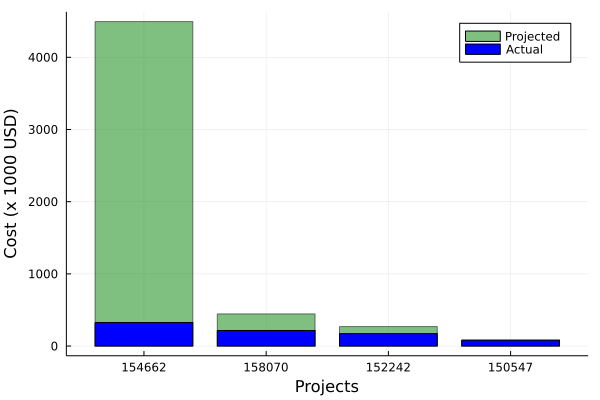

In [27]:

bar(pnames, costProjected_ENG, alpha = 0.5, color = "green", label = "Projected", grid = true)
bar!(pnames, costActuals, color = "blue", label = "Actual", grid = true, 
    xlabel = "Projects", ylabel = "Cost (x 1000 USD)")


## Team

## Create DisciplineLabor Objects

In [28]:
TONY = DisciplineLabor("430300", "HIGA ANTHONY");
ZAHID = DisciplineLabor("430300", "ZAHID ZOHAIB");
RACHIT = DisciplineLabor("430300", "SHETTY RACHIT");
UNNASSIGNED_A = DisciplineLabor("430300", "UNASSIGNED CONTROLS A");
UNNASSIGNED_B = DisciplineLabor("430300", "UNASSIGNED CONTROLS B");
SRUTHI = DisciplineLabor("430300", "VENKATACHARI SRUTHILAYA");
ABRAHAM = DisciplineLabor("430300", "CHAHLA ABRAHAM");
JULIE = DisciplineLabor("430300", "BRIONES JULITA");
BRAD = DisciplineLabor("430300", "BORDEN BRADLEY");
ANNUAR = DisciplineLabor("430300", "VALENCIA BAUTISTA ANNUAR");
RANA = DisciplineLabor("430300", "RANA MD SHOHEL");
VIRAL = DisciplineLabor("430300", "SOLANKI VIRAL");
DIDIER = DisciplineLabor("430300", "FOMEGANG PELAP DIDIER VALERY");
RISHI = DisciplineLabor("430300", "KRISHNAKUMAR RISHIKUMAR");
BRENT = DisciplineLabor("430300", "DYER BRENT");
STEVEN = DisciplineLabor("430300", "SHEN STEVEN");
SWETHA = DisciplineLabor("430300", "MAHADEVAN SWETHA");
ERIC = DisciplineLabor("430300", "LAGERMAN ERIC");
SUNIL = DisciplineLabor("430300", "THOMAS JACOB SUNIL");



## Create Teams

In [29]:
T_BUR = TeamLabor();
T_AMAZON = TeamLabor();
T_WALMART = TeamLabor();
T_RICH = TeamLabor();

### LOAD TEAMS

In [30]:
loadProject(p154662, T_BUR);
loadProject(p158070, T_WALMART);
loadProject(p152242, T_AMAZON);
loadProject(p150547, T_RICH);

In [31]:
p154662.FwdHoursForecast.Employee

String[]

In [32]:


p154662.Number

"154662"

In [33]:
T_BUR.Projects

String[]